# Popularity Based Recommender System

It is a type of recommendation system which works on the principle of popularity and or anything which is in trend. 
These systems check about the product or movie which are in trend or are most popular among the users and directly 
recommend those.

For example, if a product is often purchased by most people then the system will get to know that the product is 
most popular so for every new user who just signed it, the system will recommend such popular products to the user and 
chances are high that the new user will also purchase them. 

These type of recommendation systems does not provide personalized recommendations. It would recommend the same sort of products to all users, which are solely based upon popularity of the product.

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import textwrap

pd.options.display.max_colwidth = 100

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("pastel")
sns.set_style("white")
sns.set_context("paper", font_scale=1.35)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Load the data

In [2]:
lb = pd.read_csv('luxury_beauty_cleaned.csv')
lb.head()

,rating,userId,itemId,userName,description,title,price,rating_count,rating_avg
0,2.0,A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"['After a long day of handling thorny situations, our new hand therapy pump is just the help you...",Crabtree & Evelyn - Gardener's Ultra-Moisturising Hand Therapy Pump - 250g/8.8 OZ,30.0,582,4.623711
1,5.0,A3HO2SQDCZIE9S,B00004U9V2,chandra,"['After a long day of handling thorny situations, our new hand therapy pump is just the help you...",Crabtree & Evelyn - Gardener's Ultra-Moisturising Hand Therapy Pump - 250g/8.8 OZ,30.0,582,4.623711
2,5.0,A2EM03F99X3RJZ,B00004U9V2,Maureen G,"['After a long day of handling thorny situations, our new hand therapy pump is just the help you...",Crabtree & Evelyn - Gardener's Ultra-Moisturising Hand Therapy Pump - 250g/8.8 OZ,30.0,582,4.623711
3,5.0,A3Z74TDRGD0HU,B00004U9V2,Terry K,"['After a long day of handling thorny situations, our new hand therapy pump is just the help you...",Crabtree & Evelyn - Gardener's Ultra-Moisturising Hand Therapy Pump - 250g/8.8 OZ,30.0,582,4.623711
4,5.0,A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,"['After a long day of handling thorny situations, our new hand therapy pump is just the help you...",Crabtree & Evelyn - Gardener's Ultra-Moisturising Hand Therapy Pump - 250g/8.8 OZ,30.0,582,4.623711


In [3]:
print("No of unique users in the data : ",lb['userId'].nunique())
print("No of unique products in the data : ",lb['itemId'].nunique())

No of unique users in the data :  342713
No of unique products in the data :  6854


In [4]:
# Let us subset the data with only itemId, title, rating_count 
# and rating_avg columns to build the popularity based recommender

lb_products = lb[['itemId','title','rating_count','rating_avg']]
lb_products.drop_duplicates(subset=['itemId'], inplace=True)

## Calculate Weighted Average Score for Popularity

In [5]:
# Using Bayes Weighted Average rating method to generate popularity score
v = lb_products['rating_count']
r = lb_products['rating_avg']
C= lb_products['rating_avg'].mean()
m= lb_products['rating_count'].quantile(0.90)

In [6]:
q_lb = lb_products.loc[lb_products['rating_count'] >= m]

In [7]:
q_lb.shape

(687, 4)

In [8]:
q_lb.head()

,itemId,title,rating_count,rating_avg
0,B00004U9V2,Crabtree & Evelyn - Gardener's Ultra-Moisturising Hand Therapy Pump - 250g/8.8 OZ,582,4.623711
706,B00005V50B,"Supersmile Professional Teeth Whitening Toothpaste Recommended By Cosmetic Dentists, CLINICALLY...",558,4.177419
1264,B000066SYB,"Archipelago Morning Mint Body Lotion ,18 Fl Oz",152,4.493421
1416,B000068DWY,"Calvin Klein ck one Eau de Toilette, 3.4 fl. oz.",356,4.373596
1772,B00008WFSM,Helen of Troy 1193 Professional Flat Iron,211,3.990521


In [9]:
def weighted_rating(x, v=v, R=r, m=m, C=C):
    v = x['rating_count']
    R = x['rating_avg']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [10]:
q_lb['score'] = q_lb.apply(weighted_rating, axis=1)

## Get the top 10 products with highest popularity score

In [11]:
#Sorting products based on score calculated above
top_10 = q_lb.sort_values('score', ascending=False).head(10)

In [12]:
top_10

,itemId,title,rating_count,rating_avg,score
201606,B002A8JO1Q,MERKUR Classic 2-Piece Double Edge Saftey Razor,865,4.737572,4.658180
115882,B000ZOFUOC,"Yu-Be: Japan’s secret for dry skin relief. Deep hydrating moisturizing cream for face, hand and ...",596,4.716443,4.611865
111146,B000YBNL2Y,Jane Iredale PurePressed Base,1730,4.641618,4.606051
28994,B0007M11XQ,"Proraso Shaving Cream, Refreshing and Toning, 5.2 oz",1957,4.619315,4.589062
147288,B00175YVNO,"ELEMIS Pro-Collagen Marine Cream, Anti-wrinkle Day Cream, 1.6 fl. oz.",562,4.690391,4.585832
230236,B00396OTJ0,"EltaMD UV Facial Sunscreen Broad-Spectrum SPF 30+, 4.0 oz",479,4.703549,4.581975
173740,B001G60E3K,L'Occitane Extra-Gentle Vegetable Based Soap Enriched with Shea Butter,702,4.660969,4.578661
298929,B00837YY18,"Proraso Shaving Soap in a Bowl, Refreshing and Toning, 5.2 oz",2532,4.599526,4.576807
22817,B0006O4M8Q,"JACK BLACK – Industrial Strength Hand Healer – Hard Working Hand Cream, PureScience Formula, Non...",481,4.681913,4.565529
183074,B001MF3FMW,"Proraso Shaving Soap in a Bowl, Sensitive Skin, 5.2 oz",1270,4.600787,4.557567


[Text(0, 0, 'MERKUR Classic 2-Piece Double Edge Saftey Razor'),
 Text(0, 0, 'Yu-Be: Japan’s secret for dry skin relief. Deep\nhydrating moisturizing cream for face, hand and\nbody. Fast acting & non-greasy. No artificial\ncolors or fragrances. Jar, 2.2 Fl Oz'),
 Text(0, 0, 'Jane Iredale PurePressed Base'),
 Text(0, 0, 'Proraso Shaving Cream, Refreshing and Toning, 5.2\noz'),
 Text(0, 0, 'ELEMIS Pro-Collagen Marine Cream, Anti-wrinkle Day\nCream, 1.6 fl. oz.'),
 Text(0, 0, 'EltaMD UV Facial Sunscreen Broad-Spectrum SPF 30+,\n4.0 oz'),
 Text(0, 0, "L'Occitane Extra-Gentle Vegetable Based Soap\nEnriched with Shea Butter"),
 Text(0, 0, 'Proraso Shaving Soap in a Bowl, Refreshing and\nToning, 5.2 oz'),
 Text(0, 0, 'JACK BLACK – Industrial Strength Hand Healer –\nHard Working Hand Cream, PureScience Formula, Non-\nGreasy, Soothe Dry and Chapped Hands, Vitamin A\nand E, Macadamia Nut Oil, 3 and 16 oz.'),
 Text(0, 0, 'Proraso Shaving Soap in a Bowl, Sensitive Skin,\n5.2 oz')]

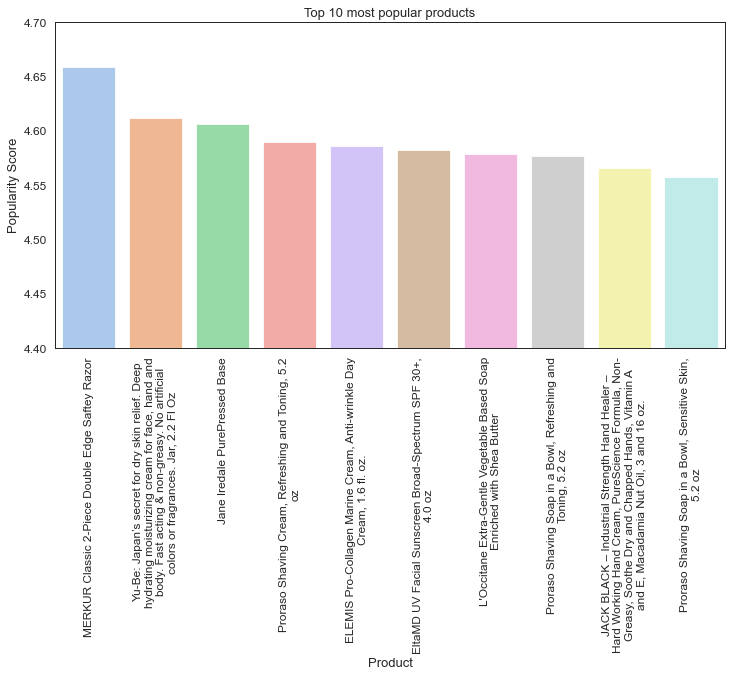

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set(ylim=(4.4, 4.70))
ax.set_title('Top 10 most popular products')
ax.tick_params(axis='x', rotation=90) 
sns.barplot(y='score', x="title", data=top_10).set(ylabel='Popularity Score', xlabel='Product')
#ax.set_xticklabels(x.get_text()[0:70] for x in ax.get_xticklabels())
ax.set_xticklabels(textwrap.fill(x.get_text(), 50) for x in ax.get_xticklabels())